In [26]:
import torch
from omegaconf import OmegaConf
from transformers.models.bert.modeling_bert import BertEmbeddings, BertPooler, BertConfig, BertEncoder
from transformers import BertTokenizer, BertPreTrainedModel, BertModel
from torch import nn
from transformers import PretrainedConfig
%load_ext autoreload
%autoreload 2
from omegaconf import OmegaConf
from pathlib import Path
import sys
import numpy as np
import h5py
from einops import rearrange
from torch import nn
import os
sys.path.append("../vcr_work/") 
sys.path.append("../vcr_work/src/")
import dataloaders.vcr as vcr
import models.bert_image as bert_image
from torch.utils.data import DataLoader

from transformers import T5Tokenizer, T5EncoderModel
from transformers import BertModel, BertTokenizerFast
import functools
from hydra import compose, initialize
from omegaconf import OmegaConf

sys.path.append(".")

from generativeimage2text.inference import test_git_inference_single_image
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
initialize(config_path='../vcr_work/config', job_name="test_app")
cfg = compose(config_name="conf")

/tmp/ipykernel_8158/3602236185.py:1: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  initialize(config_path='../vcr_work/config', job_name="test_app")


In [17]:
workdir = Path(cfg.train.workdir).expanduser()
annots_dir = workdir / cfg.data.annots_dir
img_features_dir = workdir / cfg.data.img_features_dir
dataset = vcr.VCR(split="val", mode="answer", 
                annots_dir = annots_dir, img_features_dir = img_features_dir, 
                only_use_relevant_dets=True, text_backbone="bert-base-uncased", add_image_as_a_box = False)
dataloader = DataLoader(dataset, batch_size=2, collate_fn = functools.partial(vcr.collate_fn, use_visual_modality=False))
dataloader_iterator = iter(dataloader)

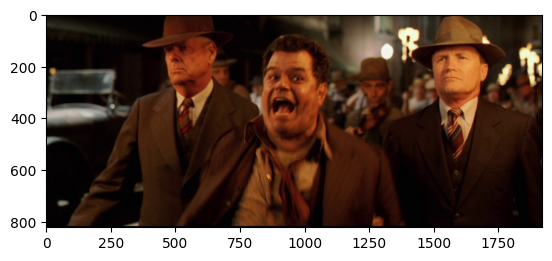

In [99]:
sample = dataset[1013]
image_path = str(workdir / cfg.data.images_dir / sample["item"]["img_fn"])
img = plt.imread(image_path)
plt.imshow(img)

In [100]:
print(sample["item"]["question"])

['Why', 'is', [1], "'", 's', 'mouth', 'open', '?']


In [103]:
model_names = ["GIT_LARGE_TEXTVQA","GIT_LARGE_TEXTCAPS","GIT_LARGE_VQAv2", "GIT_LARGE"]
model_name = model_names[0]
print(model_name)
prefix = "Why is the man in the center's mouth open?"
test_git_inference_single_image(image_path, model_name, prefix)

GIT_LARGE_TEXTVQA
output: unanswerable
